# 1. Loading and reading of the dataset 

In [1]:
#downloaded the dataset from the UCI repository archive 
#(https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease)

#decompressed the RAR file 
#turned the arff file into csv (using Python converter)

# now loading full csv into the notebook

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/Chronic_Kidney_Disease/chronic_kidney_disease_full.csv', header = 0, on_bad_lines='skip')

#there are only 25 features so no need to load only a subset of the features and no need to use chunksize

In [3]:
data

,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
393,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
394,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
395,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


# 2. Exploring, handling missing data and preprocessing

In [4]:
data.head()

,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   'age'    397 non-null    object
 1   'bp'     397 non-null    object
 2   'sg'     397 non-null    object
 3   'al'     397 non-null    object
 4   'su'     397 non-null    object
 5   'rbc'    397 non-null    object
 6   'pc'     397 non-null    object
 7   'pcc'    397 non-null    object
 8   'ba'     397 non-null    object
 9   'bgr'    397 non-null    object
 10  'bu'     397 non-null    object
 11  'sc'     397 non-null    object
 12  'sod'    397 non-null    object
 13  'pot'    397 non-null    object
 14  'hemo'   397 non-null    object
 15  'pcv'    397 non-null    object
 16  'wbcc'   397 non-null    object
 17  'rbcc'   397 non-null    object
 18  'htn'    397 non-null    object
 19  'dm'     397 non-null    object
 20  'cad'    397 non-null    object
 21  'appet'  397 non-null    object
 22  'p

In [6]:
#the dataset is about chronic kidney disease

#we are trying to model whether or not somebody has a chronic kidney disease ("class")

#starting from a dataset of 397 individuals 
#with 25 features recorded 
#out of which 11 are numerical and 14 nominal 


#The variables range from 

#1.Age(numerical)
#age in years
#2.Blood Pressure(numerical)
#bp in mm/Hg
#3.Specific Gravity(nominal)
#sg - (1.005,1.010,1.015,1.020,1.025)
#4.Albumin(nominal)
#al - (0,1,2,3,4,5)
#5.Sugar(nominal)
#su - (0,1,2,3,4,5)
#6.Red Blood Cells(nominal)
#rbc - (normal,abnormal)
#7.Pus Cell (nominal)
#pc - (normal,abnormal)
#8.Pus Cell clumps(nominal)
#pcc - (present,notpresent)
#9.Bacteria(nominal)
#ba - (present,notpresent)
#10.Blood Glucose Random(numerical)
#bgr in mgs/dl
#11.Blood Urea(numerical)
#bu in mgs/dl
#12.Serum Creatinine(numerical)
#sc in mgs/dl
#13.Sodium(numerical)
#sod in mEq/L
#14.Potassium(numerical)
#pot in mEq/L
#15.Hemoglobin(numerical)
#hemo in gms
#16.Packed Cell Volume(numerical)
#17.White Blood Cell Count(numerical)
#wc in cells/cumm
#18.Red Blood Cell Count(numerical)
#rc in millions/cmm
#19.Hypertension(nominal)
#htn - (yes,no)
#20.Diabetes Mellitus(nominal)
#dm - (yes,no)
#21.Coronary Artery Disease(nominal)
#cad - (yes,no)
#22.Appetite(nominal)
#appet - (good,poor)
#23.Pedal Edema(nominal)
#pe - (yes,no)
#24.Anemia(nominal)
#ane - (yes,no)


In [7]:
data.describe()

,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
count,397,397,397,397,397,397,397,397,397,397,...,397,397,397,397,397,397,397,397,397,397
unique,76,11,6,7,7,3,3,3,3,146,...,45,93,50,3,6,4,3,3,3,3
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,105,197,289,200,257,352,371,43,...,69,104,129,249,257,359,314,321,336,246


## 2.1 Cleaning obvious errors

In [8]:
#remove the quotes from the label of the columns                              #DATAFRAME

print("Before is", data.columns.tolist())

data.columns = [col[1:-1] for col in data.columns]

print("After is", data.columns.tolist())

Before is ["'age'", "'bp'", "'sg'", "'al'", "'su'", "'rbc'", "'pc'", "'pcc'", "'ba'", "'bgr'", "'bu'", "'sc'", "'sod'", "'pot'", "'hemo'", "'pcv'", "'wbcc'", "'rbcc'", "'htn'", "'dm'", "'cad'", "'appet'", "'pe'", "'ane'", "'class'"]
After is ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']


In [9]:
data.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,397,397,397,397,397,397,397,397,397,397,...,397,397,397,397,397,397,397,397,397,397
unique,76,11,6,7,7,3,3,3,3,146,...,45,93,50,3,6,4,3,3,3,3
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,105,197,289,200,257,352,371,43,...,69,104,129,249,257,359,314,321,336,246


In [10]:
#by looking above there is a problem with class because it says unique 3                 #CLASS
#but the classification is binary so should be 2 
print("Class categories are", len(data['class'].unique()), "should be 2 instead")
print("Actual categories for the class variable are", data['class'].unique())

#correct the error
#data.loc[(data['class'] =='ckd\t')]
data['class'].replace({"ckd\t": "ckd"}, inplace=True)
print("Now only", len(data['class'].unique()),"classes")

Class categories are 3 should be 2 instead
Actual categories for the class variable are ['ckd' 'ckd\t' 'notckd']
Now only 2 classes


In [11]:
#by looking above most of the categorical variables are now fixed
#(ie. have 2 values) 
#but for example I see cad (which stands for Coronary Artery Disease 
#so yes/no) with 3 values 
print("cad categories are", len(data['cad'].unique()), "should be 2 instead")
print("currently the categories for this feature are", data['cad'].unique())

#clearly '\tno' is an input error so we correct it for the 2 rows when there is 
#len(data.loc[(data['cad'] =='\tno')])

data['cad'].replace({"\tno": "no"}, inplace=True)
print("Now only", len(data['cad'].unique())-1,"classes") #-1 for the nan

cad categories are 4 should be 2 instead
currently the categories for this feature are ['no' 'yes' '\tno' '?']
Now only 2 classes


In [12]:
#I spot a similar issue with with anemia, pe, appet             #FEATURES
#so there is probably an issue with categorical variables 

ctg_df = data.select_dtypes(include='category') 
#from select_dtypes documentation (#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html)
#-> To select strings you must use the object dtype, but note that this will return all object dtype columns
num_df = data.select_dtypes(include='float64') 

#non riconosce i data types perchè li vede tutti direttamente come objects-> andrà sistemato 
dt = data.select_dtypes(include='object') 
dt #-> tutti

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
393,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
394,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
395,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


## 2.2 Missing data

The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.

In [13]:
#il problema è che pandas legge 
#tutti i valori delle features come stringhe perchè c'è il "?" nei missing data            #MISSING DATA
#quindi primo step è sostituire il ? con NaN 
#to then work more seamlessly with the datatypes

#guardo dove sta '?'

col_list = data.columns
data.loc[(data[col_list]=='?').any(axis=1)]
#I get that out of the 397 records 240 contains a '?' for one or more features 

#so the idea is to replace these '?' with NaN so that I can work better with isnull() functions
data = data.replace('?', np.NaN)
#data.loc[(data[col_list]=='?').any(axis=1)] -> just to check that it actually removed the '?'

#now the idea is to deal with missing data 
#(together with the issue of making pandas read the correct data type)

### 2.2.1 Analysis

First get a sense of the missing data in the dataset

In [14]:
#I want to manage the missing values
#but to handle the missing values I would like to analyze separately 
#categorical and non categorical features
#but I can't do this straightaway because pandas here reads everything
#as object since there is '?' for missing values  

In [15]:
#so I replace the'?' with nans to analyze the distribution
data = data.replace('?', np.NaN)

#while processing the rest I discovered there are also 
# '\t?' in place of '?' so I fix this as well
data = data.replace('\t?',np.NaN)

In [16]:
#Count the NA and fix the dataframe
miss = data.isnull().sum()/len(data)
miss = miss[miss>0]
miss.sort_values(inplace=True)
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['name']
miss['Name'] = miss.index
miss

,count,Name
name,,
ane,0.002519,ane
appet,0.002519,appet
pe,0.002519,pe
cad,0.005038,cad
dm,0.005038,dm
htn,0.005038,htn
ba,0.010076,ba
pcc,0.010076,pcc
age,0.022670,age


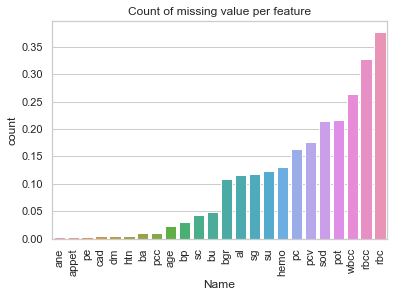

In [17]:
#Barplot of the missing 
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.title('Count of missing value per feature')
plt.show() 
#the maximum value of missing values is for rbc (Red Blood Cells) 
#where 35% is null 

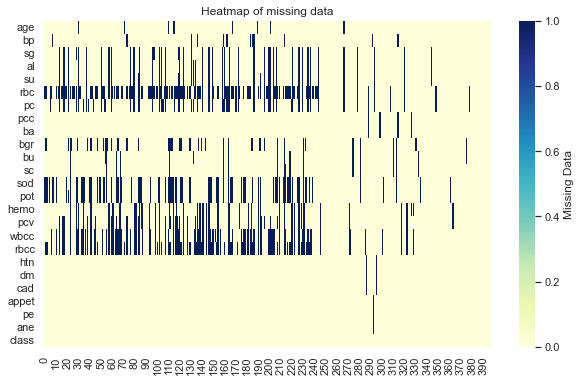

In [18]:
#heatmap of the missing data 
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.title('Heatmap of missing data')
plt.show()
#plt.savefig("Heatmap_missing_data.png", dpi=100)

#maybe they started to record some of the data (on the left) 
#after a while 
#(if we assume data has been collected chronologically from 0 to the last
#patient maybe at the beginning they weren't recording characteristics 
#such as rbc, sod, pot and all those on the left)

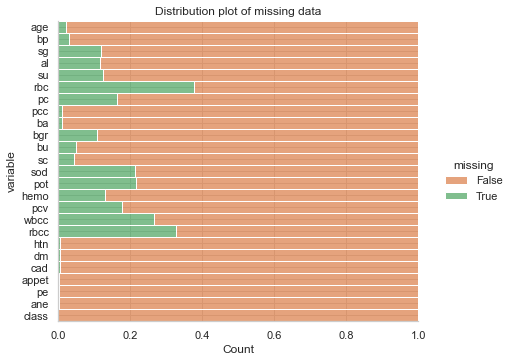

In [19]:
#Distribution plot of missing data 
#plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill", #dodge makes more confusion
    aspect=1.25,
    palette=["C1", "C2"]
)
plt.title('Distribution plot of missing data')
plt.show()
#plt.savefig("displot_missing.png", dpi=100)


In [20]:
#ANAYSIS MISSING VALUES FOR CLASS (DISEASE vs NOT DISEASE)
#to understand if there is any difference in the presence of missing
#values depending on the class

#barplot of the missing for different classes 

#divide the dataset
ckd = data[data['class']=='ckd']
notckd = data[data['class']=='notckd']

In [21]:
#create the dataframes with the two informations 

nckd = notckd.isnull().sum()/len(notckd)  #missing for those without kidney disease
nckd = nckd.to_frame()
nckd.columns = ['not_ckd']

miss_per_dis = ckd.isnull().sum()/len(ckd) #missing for those with kidney disease
miss_per_dis = miss_per_dis.to_frame()
miss_per_dis.columns = ['ckd']

miss_per_dis['not_ckd'] = nckd['not_ckd'] #merge the two (no sorting so same rows)

miss_per_dis['variable'] = miss_per_dis.index #needed for the seaborn plot

miss_per_dis #dataframe with the info

,ckd,not_ckd,variable
age,0.032258,0.006711,age
bp,0.040323,0.013423,bp
sg,0.169355,0.033557,sg
al,0.165323,0.033557,al
su,0.177419,0.033557,su
rbc,0.568548,0.060403,rbc
pc,0.225806,0.060403,pc
pcc,0.000000,0.026846,pcc
ba,0.000000,0.026846,ba
bgr,0.149194,0.040268,bgr


In [22]:
#to represent it with seaborn need to melt down columns so that they can be treated as hue in plotting
melted = miss_per_dis.melt('variable', var_name='outcome',value_name='missing')
melted

,variable,outcome,missing
0,age,ckd,0.032258
1,bp,ckd,0.040323
2,sg,ckd,0.169355
3,al,ckd,0.165323
4,su,ckd,0.177419
5,rbc,ckd,0.568548
6,pc,ckd,0.225806
7,pcc,ckd,0.000000
8,ba,ckd,0.000000
9,bgr,ckd,0.149194


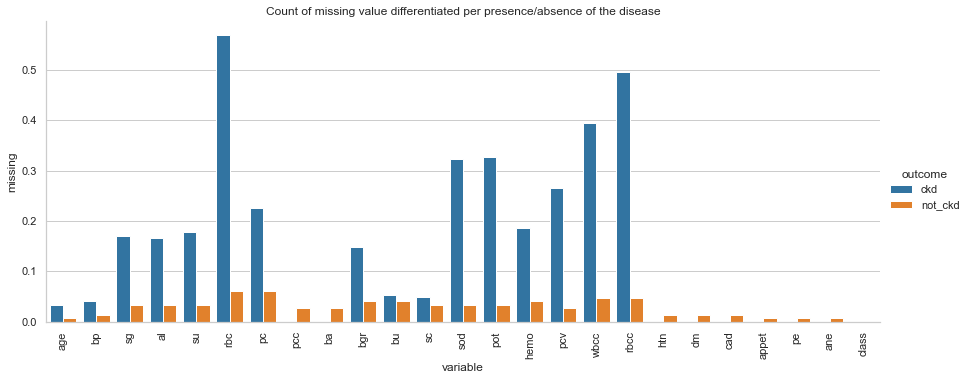

In [23]:
sns.set(style="whitegrid")
sns.catplot(x = 'variable', y='missing', hue = 'outcome',data=melted, kind='bar', palette = 'tab10',aspect=2.5)
plt.xticks(rotation = 90)
plt.title('Count of missing value differentiated per presence/absence of the disease')
plt.show() 

In [24]:
#we see  

#overall generally fewer missing values for those without the chronic disease
#but in the absence of chronic disease the number of missing values is fewer but more spreaded 
#meaning that all the features have some missing values 

#whereas for those with the kidney disease 
#not all features have missing values 
#(for all patients affected with chronic kidney disease anemia,appet, cas, pe,etc have been record)- blue on the right
#but when that feature has missing values the number is generally higher 

#this tells us that features such as red blood cells count (rbc),rbcc, wbcc,sod,pot,pc 
#are not very significant to detect chronic kidney disease
#and particular attention should be made when dealing with such missing values

### 2.2.2 Handling of missing values ( & attribution of correct datatype)

In [25]:
# quindi fatta un'idea dei NaN 
# capisco come gestirli 

# https://github.com/matthewbrems/ODSC-missing-data-may-18/blob/master/Analysis%20with%20Missing%20Data.pdf
# https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

# prima avevo '?' poi NaN quindi non riesco a dividere categoriche e non 
# quindi posso adottare un approccio generale e intanto valuto come si distribuiscono i NaN tra le variabili 
# depending on the number of features for which it has the '?'
# if more than 12 (half of the available features) features are '?' then we can reasonably drop the record

#### Deleting the features for which more than half of the records have missing values

In [26]:
#There are no features for which more than half of the records have a missing value 
#(as seen before maximum is 35%)
#so we can keep all features -> good, don't suffer of loss of information

#### Deleting the records that do not have many features

In [27]:
# Count total NaN at each row in a DataFrame and identify the records where this is greater than 10 
# reasonable since it's 24 features 

rows = []

for i in range(len(data.index)):
    rows.append([i+1, data.iloc[i].isnull().sum()])

mpr = pd.DataFrame(rows, columns = ['row', 'missing']) #mpr=missing per row
many_missing = mpr[mpr['missing']>=10]

many_missing #records I want to drop because too many missing features 
             #-> reasonable to do since the percentage of missing values is not excessive 
             #in comparison with the complete dataset
             #(it's only 11 records (out of 397))

,row,missing
23,24,10
30,31,10
59,60,11
84,85,11
102,103,11
107,108,10
146,147,11
163,164,11
213,214,10
220,221,11


In [28]:
rows_to_drop = [many_missing.index[i] for i in range(len(many_missing))] #list of the dataframe

data.drop(rows_to_drop, inplace=True)

#data.shape -> to check

#### Imputation of missing values

There is no rule of thumb to handle missing data that guarantees a robust model with good performance. 
There are several sophisticated techniques for the imputation of missing values to prevent the loss informaton while at the same time not bias the analysis and hence create a robust model (eg. imputation using Deep Learning Library Datawig or the prediction of missing values with scikitlearn which takes into account also the covariance between the missing value column and other columns). <br>
Since the purpose of this work is more on the visualization of the confusion matrix (than the processing), here the imputation is performed in a more straightforward way. 
In particular, missing values are substituted with: 
- the **most frequent** value in the case of *categorical* variables 
- the **mean** or the **median** depending on the distribution (ie. skewed -> median, non skewed -> mean) in the case of *numerical* variables 

In [29]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
393,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
394,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
395,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


##### a) Numerical variables 

In [30]:
#can't plot the distribution rightaway because of the issue
#of reading everything as object 
#(since there were '?' then substituted with NANs)
#so I make a copy of the dataset without missing to see the distributions
#and decide with which value I should substitute the missing 
#(i.e. median or mean)


#copy the dataset
dt = data.copy()

#select only numerical variables 
num_feat = ['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']
dt = dt[num_feat]

#force the numerical type 

for f in dt.columns: 
    dt[f] = dt[f].astype('float')   #non posso farlo con il ciclo for perchè ci sono \t e errori sparsi
                                    #quindi processo feature per feature <- FIXED (c'erano '\t?' ma poi ho sistemato)

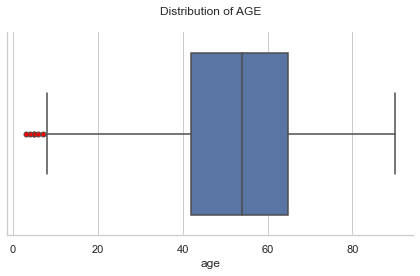

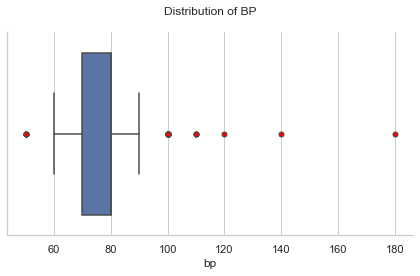

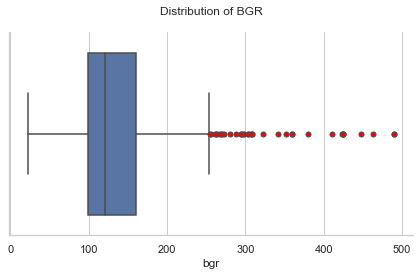

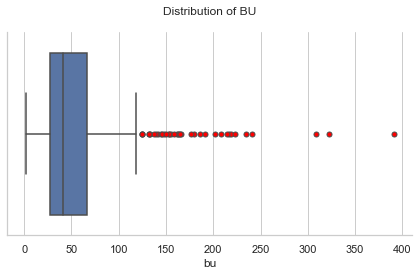

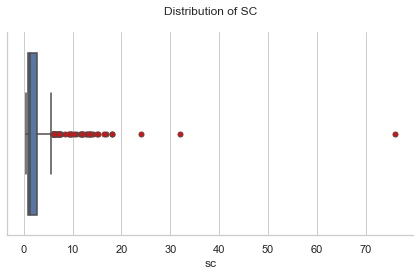

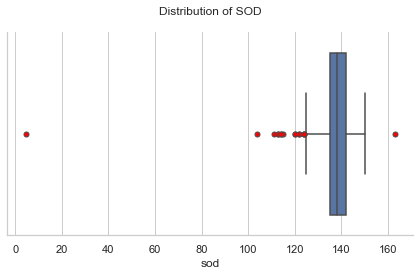

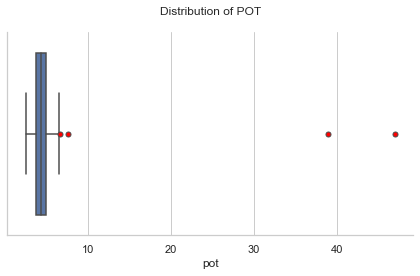

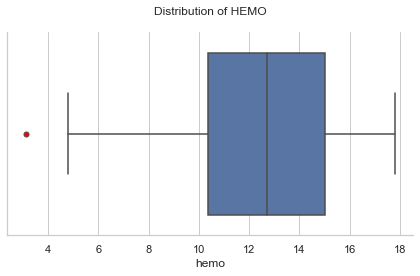

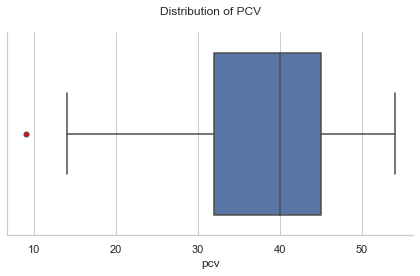

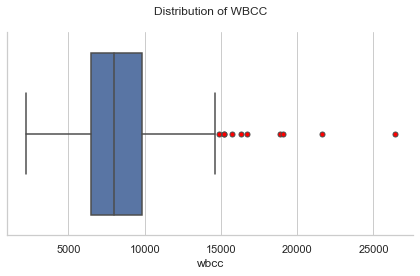

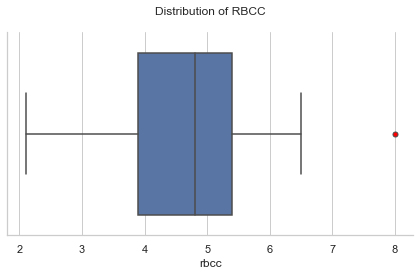

In [31]:
#Boxplots 
fig, ax = plt.subplots()
plt.title('Analysis of the boxplots - broken down per feature \n', fontsize=22 )

red_circle = dict(markerfacecolor='red',marker='o')

for col in dt.columns:
    sns.boxplot(x=dt[col], flierprops=red_circle) #flierprops per il layout degli outlier
    sns.despine()
    plt.title("Distribution of "+ col.upper() +'\n')
    plt.tight_layout()                                                      
    #plt.savefig('Distribution_{}.png'.format(col), format="PNG") #to save each graph in the directory
    plt.show()
    

In [32]:
#There are several outliers but all reasonable 
#meaning that there are no clear errors  
#(no weird things such as negatives blood pressures or similar)

In [33]:
# all features (except those below) are relatively skewed so the missing values get substituted with the median
# AGE, RBCC, PCV and HEMO are less skewed so the missing values get substituted with the mean
ft_mean= ['age','rbcc','pcv','hemo']
mean_sub = dt[ft_mean]
mean_sub

,age,rbcc,pcv,hemo
0,48.0,5.2,44.0,15.4
1,7.0,NaN,38.0,11.3
2,62.0,NaN,31.0,9.6
3,48.0,3.9,32.0,11.2
4,51.0,4.6,35.0,11.6
...,...,...,...,...
392,55.0,4.9,47.0,15.7
393,42.0,6.2,54.0,16.5
394,12.0,5.4,49.0,15.8
395,17.0,5.9,51.0,14.2


In [34]:
ft_median = [el for el in list(dt.columns) if el not in ft_mean]
median_sub = dt[ft_median]
median_sub

,bp,bgr,bu,sc,sod,pot,wbcc
0,80.0,121.0,36.0,1.2,NaN,NaN,7800.0
1,50.0,NaN,18.0,0.8,NaN,NaN,6000.0
2,80.0,423.0,53.0,1.8,NaN,NaN,7500.0
3,70.0,117.0,56.0,3.8,111.0,2.5,6700.0
4,80.0,106.0,26.0,1.4,NaN,NaN,7300.0
...,...,...,...,...,...,...,...
392,80.0,140.0,49.0,0.5,150.0,4.9,6700.0
393,70.0,75.0,31.0,1.2,141.0,3.5,7800.0
394,80.0,100.0,26.0,0.6,137.0,4.4,6600.0
395,60.0,114.0,50.0,1.0,135.0,4.9,7200.0


In [35]:
for col in median_sub.columns:
    median_sub[col].fillna(median_sub[col].median(), inplace=True)
    
median_sub 

#just warnings, no need to panic

/var/folders/9r/y0yplmy56r1_llt1sdl1g9hw0000gn/T/ipykernel_1317/3023861648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_sub[col].fillna(median_sub[col].median(), inplace=True)
/var/folders/9r/y0yplmy56r1_llt1sdl1g9hw0000gn/T/ipykernel_1317/3023861648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_sub[col].fillna(median_sub[col].median(), inplace=True)
/var/folders/9r/y0yplmy56r1_llt1sdl1g9hw0000gn/T/ipykernel_1317/3023861648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,bp,bgr,bu,sc,sod,pot,wbcc
0,80.0,121.0,36.0,1.2,138.0,4.4,7800.0
1,50.0,121.0,18.0,0.8,138.0,4.4,6000.0
2,80.0,423.0,53.0,1.8,138.0,4.4,7500.0
3,70.0,117.0,56.0,3.8,111.0,2.5,6700.0
4,80.0,106.0,26.0,1.4,138.0,4.4,7300.0
...,...,...,...,...,...,...,...
392,80.0,140.0,49.0,0.5,150.0,4.9,6700.0
393,70.0,75.0,31.0,1.2,141.0,3.5,7800.0
394,80.0,100.0,26.0,0.6,137.0,4.4,6600.0
395,60.0,114.0,50.0,1.0,135.0,4.9,7200.0


In [36]:
for col in mean_sub.columns:
    mean_sub[col].fillna(mean_sub[col].mean(), inplace=True)
    
mean_sub 

/var/folders/9r/y0yplmy56r1_llt1sdl1g9hw0000gn/T/ipykernel_1317/1680870589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_sub[col].fillna(mean_sub[col].mean(), inplace=True)


,age,rbcc,pcv,hemo
0,48.0,5.200000,44.0,15.4
1,7.0,4.702247,38.0,11.3
2,62.0,4.702247,31.0,9.6
3,48.0,3.900000,32.0,11.2
4,51.0,4.600000,35.0,11.6
...,...,...,...,...
392,55.0,4.900000,47.0,15.7
393,42.0,6.200000,54.0,16.5
394,12.0,5.400000,49.0,15.8
395,17.0,5.900000,51.0,14.2


In [37]:
numerical = pd.concat([mean_sub, median_sub], axis=1)
numerical

,age,rbcc,pcv,hemo,bp,bgr,bu,sc,sod,pot,wbcc
0,48.0,5.200000,44.0,15.4,80.0,121.0,36.0,1.2,138.0,4.4,7800.0
1,7.0,4.702247,38.0,11.3,50.0,121.0,18.0,0.8,138.0,4.4,6000.0
2,62.0,4.702247,31.0,9.6,80.0,423.0,53.0,1.8,138.0,4.4,7500.0
3,48.0,3.900000,32.0,11.2,70.0,117.0,56.0,3.8,111.0,2.5,6700.0
4,51.0,4.600000,35.0,11.6,80.0,106.0,26.0,1.4,138.0,4.4,7300.0
...,...,...,...,...,...,...,...,...,...,...,...
392,55.0,4.900000,47.0,15.7,80.0,140.0,49.0,0.5,150.0,4.9,6700.0
393,42.0,6.200000,54.0,16.5,70.0,75.0,31.0,1.2,141.0,3.5,7800.0
394,12.0,5.400000,49.0,15.8,80.0,100.0,26.0,0.6,137.0,4.4,6600.0
395,17.0,5.900000,51.0,14.2,60.0,114.0,50.0,1.0,135.0,4.9,7200.0


##### b) Categorical variables 

In [38]:
#select only categorical features 
#(Note: remember that I am doing this whole thing because it reads 
#everything as object since there are Nan and '?' 
#and cannot set it in the read)

cat_feat = list(set(data.columns) - set(num_feat))
categorical = data[cat_feat]
categorical

,appet,pe,pc,htn,ba,cad,class,su,pcc,al,ane,dm,sg,rbc
0,good,no,normal,yes,notpresent,no,ckd,0,notpresent,1,no,yes,1.020,NaN
1,good,no,normal,no,notpresent,no,ckd,0,notpresent,4,no,no,1.020,NaN
2,poor,no,normal,no,notpresent,no,ckd,3,notpresent,2,yes,yes,1.010,normal
3,poor,yes,abnormal,yes,notpresent,no,ckd,0,present,4,yes,no,1.005,normal
4,good,no,normal,no,notpresent,no,ckd,0,notpresent,2,no,no,1.010,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,good,no,normal,no,notpresent,no,notckd,0,notpresent,0,no,no,1.020,normal
393,good,no,normal,no,notpresent,no,notckd,0,notpresent,0,no,no,1.025,normal
394,good,no,normal,no,notpresent,no,notckd,0,notpresent,0,no,no,1.020,normal
395,good,no,normal,no,notpresent,no,notckd,0,notpresent,0,no,no,1.025,normal


In [39]:
#substitute with most frequent value 
categorical = categorical.fillna(categorical.mode().iloc[0]) 
categorical

,appet,pe,pc,htn,ba,cad,class,su,pcc,al,ane,dm,sg,rbc
0,good,no,normal,yes,notpresent,no,ckd,0,notpresent,1,no,yes,1.020,normal
1,good,no,normal,no,notpresent,no,ckd,0,notpresent,4,no,no,1.020,normal
2,poor,no,normal,no,notpresent,no,ckd,3,notpresent,2,yes,yes,1.010,normal
3,poor,yes,abnormal,yes,notpresent,no,ckd,0,present,4,yes,no,1.005,normal
4,good,no,normal,no,notpresent,no,ckd,0,notpresent,2,no,no,1.010,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,good,no,normal,no,notpresent,no,notckd,0,notpresent,0,no,no,1.020,normal
393,good,no,normal,no,notpresent,no,notckd,0,notpresent,0,no,no,1.025,normal
394,good,no,normal,no,notpresent,no,notckd,0,notpresent,0,no,no,1.020,normal
395,good,no,normal,no,notpresent,no,notckd,0,notpresent,0,no,no,1.025,normal


In [40]:
#while doing the encoding of categorical variables some '\t' 
#have emerged so I fix them here 

print("The dm feature has the following categorical values", categorical['dm'].unique())

categorical['dm'].replace({'\tno':'no','\tyes':'yes'},inplace= True)


print("The dm feature has the following categorical values", categorical['dm'].unique())

The dm feature has the following categorical values ['yes' 'no' '\tno' '\tyes']
The dm feature has the following categorical values ['yes' 'no']


In [41]:
#and I separate the target variable from the categorical predictors 
target = 'class'
Y = categorical[target]
categorical.drop('class', inplace=True, axis=1)

In [42]:
categorical

,appet,pe,pc,htn,ba,cad,su,pcc,al,ane,dm,sg,rbc
0,good,no,normal,yes,notpresent,no,0,notpresent,1,no,yes,1.020,normal
1,good,no,normal,no,notpresent,no,0,notpresent,4,no,no,1.020,normal
2,poor,no,normal,no,notpresent,no,3,notpresent,2,yes,yes,1.010,normal
3,poor,yes,abnormal,yes,notpresent,no,0,present,4,yes,no,1.005,normal
4,good,no,normal,no,notpresent,no,0,notpresent,2,no,no,1.010,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,good,no,normal,no,notpresent,no,0,notpresent,0,no,no,1.020,normal
393,good,no,normal,no,notpresent,no,0,notpresent,0,no,no,1.025,normal
394,good,no,normal,no,notpresent,no,0,notpresent,0,no,no,1.020,normal
395,good,no,normal,no,notpresent,no,0,notpresent,0,no,no,1.025,normal


## 2.3 Exploration of the cleaned dataset

### Grouped bar chart - categorical features vs target variable

In [43]:
bar_chart_data = categorical.copy()
bar_chart_data['class'] = data['class']

In [44]:
fig = plt.figure(figsize=(30,15))

cfeatures = list(categorical.columns) #not the class

for i in range(len(features)):
    column= cfeatures[i]
    sub = fig.add_subplot(3,5,i+1)
    chart = sns.countplot(data=bar_chart_data, x=column, hue='class', palette = 'tab10') #alt: RdYlBu, ma così è più unifrome

NameError: name 'features' is not defined

<Figure size 2160x1080 with 0 Axes>

Grouped bar chart is a straightforward representation to show how each categorical value weigh in determining the class. For example, patients with and without hypertension have distinctly distribution of target value, which indicates it is likely to contribute more to the prediction of the target. Similarly,there is a different distribution of the disease according to the presence or absence of Coronary Artery Disease (cad), in the dataset there are no patients with the coronary disease that do not have the chronic kidney disease. 
<br>
Overall, all the displayed categorical features appears to have different distribution of the class according to the categorical value so I expect all features to be relevant in predicting the class. 

### Boxplot - numerical features vs target variable 

In [ ]:
bpt_data = numerical.copy()
bpt_data['class'] = data['class']
bpt_data

In [ ]:
nfeatures = list(numerical.columns)
fig = plt.figure(figsize=(30,20))

for i in range(len(nfeatures)):
    column = nfeatures[i]
    sub= fig.add_subplot(3,4, i +1)
    sns.boxplot(x='class', y=column, data=bpt_data, palette='tab10')

The boxplot shows how the values of the numerical features vary depending on the class (presence or absence of the kidney disease). For example, Blood Glucose Random (bgr) has a clear difference when the patient is affected by the chronic kidney disease (for those without the disease the blood glucose random tends to be around the same value, whereas for those with the disease there is a greater range of values) so I expect this features to play a greater role in the prediction of the class. This is true also for other features such as age, rbcc and all those with a different distribution. <br> 

## 2.4 Feature engineering (normalization of numerical predictors, encoding of categorical predictors) and merging of the final dataset

### 2.4.1. Normalization

In [ ]:
#the features have different range so I proceed with
#Normalization 
#(=rescaling by the minimum and range of the vector 
#to make all the elements lie between 0 and 1 
#bringing all data to a common scale)

In [ ]:
numerical

In [ ]:
#fig, ax = plt.subplots()

for col in numerical.columns:
    sns.displot(x=numerical[col], binwidth=3, bins=10) 
    sns.despine()
    plt.title("Distribution of "+ col.upper() +'\n')
    plt.tight_layout()                                                      
    #plt.savefig('Distribution_{}.png'.format(col), format="PNG") #to save each graph in the directory
    plt.show()

In [ ]:
#varying scale and distribution is not gaussian so we normalize 
#(useful if the algorithm does not make assumptions about the distribution of the data
# such as KNN and artifical neural networks)

In [ ]:
print("Before:")
numerical

In [ ]:
numerical.iloc[:,0:-1] = numerical.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

In [ ]:
print("After:")
numerical

### 2.4.2 Encoding

In [ ]:
#need to convert each text category to numbers in order for the machine 
#to process them using mathematical equations.

#one hot encoding (= each category is represented by a binary vector)
#I use one hot encoding so to avoid the situation where I might end up confusing the model into thinking
#that a column has data with some kind of order or hierarchy when there is not 
#since the categorical data is nominal (even specific gravity and albumin)
#
#(non label encoding perchè con label encoding le categorie sono ranked alphabetically 
#quindi una categoria risulta migliore di un'altra
#e soprattutto con linear models and SVMs we could have problems)

#There may be problems when there is no ordinal relationship and allowing the representation 
#to lean on any such relationship might be damaging to learning to solve the problem.

#onehotencoding mi aumenterà molto le colonne ma rimane comunque meno del numero di records

In [ ]:
#con SKLEARN

#OneHotEncoder() vs pandas.get_dummies()
#https://albertum.medium.com/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc
#-> OHE does the same things as get dummies but in addition, OHE saves the exploded categories into it’s object
#Saving exploded categories is extremely useful when I want to apply the same data pre-processing on my test set
#in quest'applicazione mi fa uguale quindi posso usare get_dummies()
#OneHotEncoder Features: 

#- encode categorical integer features using a one-hot aka one-of-K scheme
#- the input to this transformer should be a matrix of integers, denoting the values 
#  taken on by categorical (discrete) features
# -the output will be a sparse matrix where each column corresponds to one possible value of one feature
#- it is assumed that input features take on values in the range [0, n_values)
#- this encoding is needed for feeding categorical data to many scikit-learn estimators, 
#  notably linear models and SVMs with the standard kernels

#from sklearn.preprocessing import OneHotEncoder 
#ohe = OneHotEncoder()
#X = ohe.fit_transform(categorical).toarray()
#X
#pd.DataFrame(X)

#-> qui fatto con sklearn ma uso get_dummies() che by default fa one-hot encoding
#   e comunque non avrò categorie che appaiono nel test set e non nel train quindi dovrebbe andare bene  

In [ ]:
categorical = pd.get_dummies(categorical)
categorical

In [ ]:
categorical.shape 
#there are more columns due to the encoding
#but I still do not encounter issues of high dimensionality 
#(39 colonne vs 386 records so no issues in the transposing 
#of the matrix because I still have more records than columns)

In [ ]:
numerical

In [ ]:
numerical.shape

In [ ]:
##FEATURE SELECTION 
#using sklearn 

#I have a manageable number of features so no need to remove them 
#the only issue could be with multicollinearity
#multicollinearity but should not be too much of an issue in ML predictions
#https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc
#https://stats.stackexchange.com/questions/168622/why-is-multicollinearity-not-checked-in-modern-statistics-machine-learning/168631#168631

#however just to be sure I check also the VIF 
#(measures the ratio between the variance for a given regression coefficient
#with only that variable int he model versus the variance for a given 
#regression coefficient with all variables in the model) 

In [ ]:
#!pip install statsmodels

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = numerical.columns
vif_data["VIF"] = [variance_inflation_factor(numerical.values, i) for i in range(len(numerical.columns))]

In [ ]:
vif_data
#VIF =1 (minimum possible) means the tested predictor is not correlated with the others
#the higher the VIF 
#The more correlated a predictor is with the other predictors
#- the more the standard error is inflated
#- the larger the confidence interval
#- the less likely it is that a coefficient will be evaluated as statistically significant

In [ ]:
#so even if multicollinearity was an issue
#this is not the case 

### 2.4.3. Merging of the final dataset and balance check

In [ ]:
#categorical e numerical features 
finalDT = pd.concat([numerical, categorical], axis=1)
finalDT

In [ ]:
#target variable
Y
Y.replace({"ckd": 1, "notckd": 0}, inplace=True)

In [ ]:
#final dataset
finalDT = pd.concat([finalDT,Y], axis=1)
finalDT

In [ ]:
plt.figure(figsize=(8,7))
ax = sns.countplot(x=finalDT["class"])  #palette=['chartreuse', 'darkviolet']
sns.set(style="whitegrid")
sns.set_palette('colorblind')
plt.title("Countplot of the target variable \n", fontsize=15, fontweight='bold') 
ax.set_xticklabels(['Absence of disease','Presence of disease'], fontsize=15)
ax.set_xlabel('')

#add percentage
total = float(len(finalDT))
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 
    y = p.get_height()+5
    ax.annotate(percentage,(x, y), ha='center', va='center', size=15)

#plt.tight_layout()
plt.show()
#unbalanced towards the presence of the chronic kidney disease
#generally in medical datasets it's the opposite
#but still what I care about is that it's unbalanced
#(not really towards which class)
#to show the greater robustness of the metric and the evaluation

## 2.5 Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#target variable
y = finalDT['class']
y

#predictors
x = finalDT.copy()
x.drop('class', inplace=True, axis=1)

In [ ]:
#split train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
#testsize not too big  because I have relatively few records
#randomstate for reproducibility

# 3. Classification and performance assessment 

In [ ]:
#per ricordarmi di spostare qui tutto quello che ho importato

In [ ]:
import timeit

## 3.1 Linear methods

### Logistic regression

In [ ]:
#learns the probability of a sample belonging to a certain class 

# discriminative model 
#(=directly models the posterior probability of P(y|x) y learning the input to output mapping by minimising error)
#                      #posterior=update of prob of event A happening given new info as event B happening

In [ ]:
#import 
from sklearn.linear_model import LogisticRegression

start = timeit.default_timer() #for all models I record the time

#instance of the model 
logreg = LogisticRegression()

#the model learns the relationship between predictors and label 
logreg.fit(X_train, y_train)

#predict the label on test set 
predictionsLR = logreg.predict(X_test)

stop = timeit.default_timer()
print('Time: ', stop - start) 

predictionsLR

In [ ]:
#then evaluate
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

In [ ]:
cmLR = confusion_matrix(y_test,predictionsLR)
cmLR

In [ ]:
#DEFINISCI FUNZIONE PER QUESTE METRICHE invece che definirle una per una

"""
def matrix_metrix(real_values,pred_values):
    CM = confusion_matrix(real_values,pred_values) #get confusion matrix
    
    TN = CM[0][0]     #confusion matrix entries and n° of samples
    FN = CM[1][0] 
    TP = CM[1][1]
    FP = CM[0][1]
    tot = TN+FN+TP+FP
    
    #performance metrics with 2 matrix entries
    Prevalence = round( (TP+FP) /tot,2)
    Accuracy   = round( (TP+TN) / tot,4)
    Precision  = round( TP / (TP+FP),4 )
    NPV        = round( TN / (TN+FN),4 ) 
    FDR        = round( FP / (TP+FP),4 )
    FOR        = round( FN / (TN+FN),4 ) 
    check_Pos  = Precision + FDR
    check_Neg  = NPV + FOR
    
    #performance metrics with more than 2 entries -> more comprehensive metrics
    Recall     = round( TP / (TP+FN),4 )
    FPR        = round( FP / (TN+FP),4 ) #false positive rate
    FNR        = round( FN / (TP+FN),4 ) #false negative rate
    TNR        = round( TN / (TN+FP),4 ) #true negative rate 
    check_Pos2 = Recall + FNR
    check_Neg2 = FPR + TNR
    
    LRPos      = round( Recall/FPR, 4 )   #positive likelihood
    LRNeg      = round( FNR / TNR ,4 )   #negative likelihood 
    
    DOR        = round( LRPos/LRNeg)
    F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)
    #FBeta      = round ( (1+beta**2)*((Precision*Recall)/((beta**2 * Precision)+ Recall)) ,4)
    MCC        = round ( ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))  ,4)
    BM         = Recall+TNR-1
    MK         = Precision+NPV-1
    mat_met = pd.DataFrame({
        'Metric':['TP','TN','FP','FN','Prevalence','Accuracy','Precision','NPV','FDR','FOR','check_Pos','check_Neg','Recall','FPR','FNR','TNR','check_Pos2','check_Neg2','LR+','LR-','DOR','F1','MCC','BM','MK'], #,'FBeta'    
        'Value':[TP,TN,FP,FN,Prevalence,Accuracy,Precision,NPV,FDR,FOR,check_Pos,check_Neg,Recall,FPR,FNR,TNR,check_Pos2,check_Neg2,LRPos,LRNeg,DOR,F1,MCC,BM,MK]}) #FBeta
    return (mat_met)
    
"""

In [ ]:
#DOR = (TP / (TP+FN)/FP / (TN+FP))/(FN / (TP+FN)/TN / (TN+FP))

In [ ]:
#matrix_metrix(y_test, predictionsLR)

In [ ]:
#Accuracy
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

accuracyLR = logreg.score(X_test, y_test)
print(accuracyLR)


#COMPREHENSIVE METRICS

#MCC/phi coefficient
#essentially a correlation coefficient between -1(inverse prediction) and 1 (with being 0 average random prediction)
#takes into account true and false positives and negatives 
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html
MCCLR = matthews_corrcoef(y_test, predictionsLR)
print(MCCLR)


#DOR 
#=TP/FN*FP/TN
#DOR = (TP / (TP+FN)/FP / (TN+FP))/(FN / (TP+FN)/TN / (TN+FP))
TPLR = cmLR[0][0]
FNLR = cmLR[0][1]
FPLR = cmLR[1][0]
TNLR = cmLR[1][1]

DOR = TPLR/FNLR*FPLR/TNLR
print(DOR)



#F1_score = harmonic mean of precision and recall (0=worst, 1=best)
#F1=2*(precision*recall)/(precision+recall)
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
F1LR = f1_score(y_test, predictionsLR, 
                average=None) #only required for multiclass targets
print(F1LR)

In [ ]:
#ROC curve
#from sklearn



In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cmLR, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for Logistic Regression: {0}'.format(accuracyLR)
plt.title(all_sample_title, size = 15);

In [ ]:
#molto alto 

#errore è effettivamente sul test quindi sta performando molto bene 
#che è un po' sospetto ma vedo prima tutti gli altri

#assumptions della logreg: 
#- independence of errors, 
#- linearity in the logit for continuous variables, 
#- absence of multicollinearity
#- lack of strongly influential outliers

### Naive Bayes 

In [ ]:
#Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features

#1. calculates prior probability for a given class label 
#2. calculate conditional probability with each attribute for each class
#3. multiply same class conditional probability
#4. multiply prior probability with step 3 probability
#5. sees which class has higher probability, higher probability class belongs to given input set step

# generative model
# (= models the joint distribution of the feature X and the targetY, 
#    and then predicts the posterior probability given as P(y|x))

In [ ]:
#import the model 
from sklearn.naive_bayes import GaussianNB

start = timeit.default_timer()

#make an instance of the model 
NB = GaussianNB()

#make the model learn the relationship between predictors and label 
NB.fit(X_train, y_train)

#predict the label on test set 
predictionsNB = NB.predict(X_test)
stop = timeit.default_timer()
print('Time: ', stop - start) 

predictionsNB

In [ ]:
cmNB = confusion_matrix(y_test,predictionsNB)
cmNB

In [ ]:
accuracyNB = NB.score(X_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cmNB, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for Naive Bayes: {0}'.format(accuracyNB)
plt.title(all_sample_title, size = 15)
plt.show()

In [ ]:
#anche questo molto alto 
#ma probabilmente è solo che i modelli lineari si prestano particolarmente a questo dataset 
#che è piccolo, non high dimensional e abbastanza omogeneo (anche per come sono ho gestito i missing values)

### 3.2 Non linear: KNN

In [ ]:
#does not make any assumption on the data distribution (non parametric)

#KNN can be summarized as below:
#1.Computes the distance between the new data point with every training example.
#2.For computing the distance measures such as Euclidean distance, Hamming distance or Manhattan distance will be used.
#3.Model picks K entries in the database which are closest to the new data point.
#4.Then it does the majority vote i.e the most common class/label among those K entries will be the class of the new data point.

In [ ]:
#import the model 
from sklearn.neighbors import KNeighborsClassifier

#different K to check which to choose
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    predKNN = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,predKNN)
    scores_list.append(metrics.accuracy_score(y_test,predKNN))

In [ ]:
%matplotlib inline

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#best appears to be at 3

In [ ]:

start = timeit.default_timer()

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

predKNN_3k = knn.predict(X_test)

stop = timeit.default_timer()
print('Time: ', stop - start) 

predKNN_3k

In [ ]:
cmKNN = metrics.confusion_matrix(y_test,predKNN_3k)
cmKNN

In [ ]:
accuracyKNN = knn.score(X_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cmKNN, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for KNN: {0}'.format(accuracyKNN)
plt.title(all_sample_title, size = 15);

In [ ]:
#particolarmente basso rispetto agli altri 

#probabilmente appunto è la questione della linearità perchè pure i tree performano peggio 

## 3.2 Tree based methods

Tend to overfit

### 3.2.1 Decision Tree

In [ ]:
#DECISION TREE

#import model
from sklearn.tree import DecisionTreeClassifier

start = timeit.default_timer()

#make instance of the model 
dt = DecisionTreeClassifier()

#fit the classifier
dt = dt.fit(X_train, y_train)

#predict response
predDT = dt.predict(X_test)

stop = timeit.default_timer()
print('Time: ', stop - start) 

predDT

In [ ]:
cmDT = metrics.confusion_matrix(y_test,predDT)
cmDT

In [ ]:
accuracyDT = dt.score(X_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cmDT, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(accuracyDT)
plt.title(all_sample_title, size = 15);

In [ ]:
#con i tree va peggio - coerente con il peggioramento del KNN

In [ ]:
#!Pip install graphviz
#!pip install pydotplus

In [ ]:
from six import StringIO

In [ ]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
 
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(X_train.columns),class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTree.png')
Image(graph.create_png())

### 3.2.2 Bagging Decision Tree (Ensemble learning I)

In [ ]:
# taking bootstraps from the training data (=bagging)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
start = timeit.default_timer()

bg = BaggingClassifier(DecisionTreeClassifier(), 
                      max_samples = 0.5,  #maximum size: 50% di tutto il dataset per ogni sample
                      max_features = 1.0, #maximum of features: con 1 è 100% quindi tutte le 48 features
                      n_estimators = 10)  #number of estimators: il numero di decision trees

bg.fit(X_train, y_train)

predBG = bg.predict(X_test)

stop = timeit.default_timer()
print('Time: ', stop - start) 

predBG

In [ ]:
cmBG = metrics.confusion_matrix(y_test,predBG)
cmBG

In [ ]:
accuracyBG = dt.score(X_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cmBG, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for Tree with Bagging: {0}'.format(accuracyBG)
plt.title(all_sample_title, size = 15);

In [ ]:
#potrei anche risparmiare questi altri modelli di tree dato che già capisco che tree is not the way to go
#ma voglio vedere se è così peggiorata perchè è solo un tree o con gli ensemble migliora

#perchè i tree hanno la tendenza a overfittare in generale

### 3.2.3 Boosted Decision Tree (Ensemble learning II)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
start = timeit.default_timer() 

adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,
                                                max_depth=4),
                                               n_estimators=10,
                                               learning_rate=0.6)

adb.fit(X_train, y_train)

predBS = adb.predict(X_test)

stop = timeit.default_timer()
print('Time: ', stop - start)
predBS

In [ ]:
cmBS = metrics.confusion_matrix(y_test,predBS)
cmBS #tutti true 

In [ ]:
accuracyBS = dt.score(X_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cmBS, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for Tree with Boosting (AdaBoost): {0}'.format(accuracyBS)
plt.title(all_sample_title, size = 15);

In [ ]:
#ormai è accanimento terapeutico ma a questo punto vedo anche con random fores

#se facessi più valutazioni sugli iperparametri forse migliorerebbe 

### 3.2.4 Random Forest (Ensemble learning III)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
start = timeit.default_timer()

rf = RandomForestClassifier(n_estimators=30, max_depth=9)

rf.fit(X_train, y_train)

predRF = rf.predict(X_test)

stop = timeit.default_timer()
print('Time: ', stop - start)

predRF

In [ ]:
cmRF = metrics.confusion_matrix(y_test,predRF)
cmRF #tutti true 
accuracyRF = dt.score(X_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cmRF, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for Tree with Random Forests: {0}'.format(accuracyRF)
plt.title(all_sample_title, size = 15);

In [ ]:
#va beh sembra che con quelli lineari vada meglio

## 3.3 Support vector machines

In [ ]:
#kernel (=transforms an input data space into the required form) trick to handle nonlinear input spaces 
#(to transform the input space to a higher dimensional space so that 
#then one can easily separate the classes using linear separation)

#The classifier separates data points using a hyperplane with the largest amount of margin. 
#That's why an SVM classifier is also known as a discriminative classifier. 
#SVM finds a maximum marginal hyperplane (MMH) in multidimensional space which helps in classifying new data points.
#(iterative manner that minimizes error)

In [ ]:
from sklearn import svm

start = timeit.default_timer()

vect = svm.SVC(kernel='linear')

vect.fit(X_train, y_train)

predvect = vect.predict(X_test)

stop = timeit.default_timer()
print('Time: ', stop - start)

predvect

In [ ]:
cmSVM = metrics.confusion_matrix(y_test,predvect)
accuracySVM = vect.score(X_test, y_test)

plt.figure(figsize=(9,9))
sns.heatmap(cmKNN, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score for SVM: {0}'.format(accuracySVM)
plt.title(all_sample_title, size = 15);

In [ ]:
#questo performa bene ma più tempo

In [ ]:
#hyperparameters:
#-kernel
#-regularization
#–gamma

In [ ]:
#advantages:
#–good accuracy and faster predictions wrt NB
#-less memory usage because it uses a subset of training points in the decision phase
#-works well with high dimensional space (here the features are not too many so the advantage is not extremely 
# harnessed but still good performance)

#disadvantages:
#-not suitable for large datasets because of high training time (non è questo il caso)
#–sensitive to the type of kernel used 

# 4. Visualization of the tetrahedron

# Plotly

Built on top of the Plotly Javascript library (plotly.js), Plotly is an open-source plotting library that enables the creation of interactive web-based visualizations. I use Plotly for three main reasons:  
- extreme customization
- possibility to display visualizations within Jupyter Notebooks, to save them to standalone html files but also to serve them as part of analytical web-applications using Dash (https://dash.plotly.com/installation) 
<br>

An alternative could have been Ipyvolume which is still open source 

#Python's visualisation landscape
#using markdown ![viz](viz_landscape.jpeg)



In [ ]:
import numpy as np
import plotly.graph_objects as go

In [ ]:
#riprendo le cm dai modelli
cmLR

In [ ]:
cm_badc=np.array([[10,30],
         [55,5]])
cm_badc

In [ ]:
fig = go.Figure(data=[
    go.Mesh3d(
        x=[0, 0, 0, 1], #verticalmente ho definito O, C, B, A
        y=[0, 0, 1, 0],
        z=[0, 1, 0, 0],
        
        colorbar_title='z',
        
        colorscale=[[0, 'gold'],
                    [0.5, 'mediumturquoise'],
                    [1, 'magenta']],
        #colors = colorRamp(c("red",'yellow','white','green','blue')),
        
        # Intensity of each vertex, which will be interpolated and color-coded
        intensity=[0, 0.33, 0.66, 1],
        
        opacity = 0.5, #for transparency
        
        # i, j and k sono i vertici dei triangoli
        # here we represent the 4 triangles of the tetrahedron surface
        i=[0, 0, 0, 1],
        j=[1, 2, 3, 2],
        k=[2, 3, 1, 3],
        name='y',
        showscale=True
    )
])



#PRIMA QUESTIONE 
#aggiungere il punto per la confusion matrix dello use case specifico 

#Modello LogReg
N = sum(sum(cmLR))
xLR = [cmLR[0][0]/N] #TP/N
yLR = [cmLR[1][1]/N] #TN/N
zLR = [cmLR[0][1]/N] #FP/N


fig.add_trace(go.Scatter3d(mode='markers', 
                           x= xLR, 
                           y= yLR, 
                           z= zLR, 
                           marker = dict(color='black', size=5), showlegend=False))


#Modello NB



#Modello KNN


#Modello DT
xDT = [cmDT[0][0]/N] #TP/N
yDT = [cmDT[1][1]/N] #TN/N
zDT = [cmDT[0][1]/N] #FP/N


fig.add_trace(go.Scatter3d(mode='markers', 
                           x= xDT, 
                           y= yDT, 
                           z= zDT, 
                           marker = dict(color='red', size=5), showlegend=False))


#Modello SVM 


#metto i punti dei vari modelli così se riesco a mettere il gradiente dovrebbe risultare 
#facile valutare l'algoritmo migliore 


#sono tutte relativamente buone confusion matrices 
#quindi faccio esempio di confusion matrix che uscirebbe da una classificazione non accurata 
#per far vedere la differenza 
xB = [cm_badc[0][0]/N] #TP/N
yB = [cm_badc[1][1]/N] #TN/N
zB = [cm_badc[0][1]/N] #FP/N
fig.add_trace(go.Scatter3d(mode='markers', 
                           x= xB, 
                           y= yB, 
                           z= zB, 
                           marker = dict(color='green', size=5), showlegend=False))



#SECONDA QUESTIONE
#devo capire come distinguere le due sfumature per avere ABC e AOB verdi/blu
#                                                        AOC e BOC arancione/gialli
#le sfumature tral'altro lungo OC e lungo AB 
#-> gradiente come funzione lineare dell'indicatore

#andrà aggiunto una nuova linea

#devo generare ogni possibile confusion matrix per ogni combinazione
#di TP,TN,FP (diviso n)
#calcolare mcc associato a ciascuna di questa matrice 
#rendere il colore 

#potrei dividere le due mesh (verde/blu e giallo/rosso)

#verosimilmente discretizzo (1M points) e per ogni punto calcolo MCC
#http://al-roomi.org/3DPlot/index.html


#piano passante per 3 punti
#ax+by+cz+d=0
#x+y+z-1=0 equazione del piano nostro http://al-roomi.org/3DPlot/index.html


fig.show()

In [ ]:
import math

In [ ]:
#COMMENTO PER NON AVERCELO OGNI VOLTA CHE ESEGUO LE APPLICAZIONI SOTTO 
#MA SCOMMENTANDOLO SI HA RISULTATO 

"""

#definisco 3 vettori x,y,z discretizzati da 0 a 1
xd = np.linspace(0,1, num=100) #metto intanto pochi punti
yd = np.linspace(0,1, num=100)
zd = np.linspace(0,1, num=100)

#voglio creare un vettore di x,y,z per avere tutti i punti del cubo 
#lo faccio definendo 
#x>0 con x= 0->1
#y>0     y= 0->1
#z>0     z= 0->1

#e poi filtrare per quelli che stanno sotto il piano x+y+z-1=0
#cioè z < 1 - x - y (seconda condizione da soddisfare)
#points = [xd.T,yd.T,zd.T] #per avere matrice di vettori colonna
#points

#points=np.meshgrid(xd,yd,zd,indexing='ij')
#points

all_p_array = np.array(np.meshgrid(xd, yd, zd)).T.reshape(-1,3)
#len(all_p_array) just to check

column_values = ['x','y','z']
all_p_df = pd.DataFrame(data=all_p_array,
                        columns=column_values)
all_p_df
#print(len(all_p_df))

#adesso voglio droppare le righe se stanno sopra il piano
#cioè se z > 1 -x -y
filtered = all_p_df.query('z<1-x-y')
filtered
#ha senso che sia 1/5 perchè ne avrai che si ripetono 4 e uno in centro

#temporaneo -brutto codice 
#filtered['size']= 12
#filtered.loc[:, 'size'] = 5


#aggiungo colonna MCC

#sklearn usa le predizioni non le entries della confusion matrix 
#quindi lo ridefinisco 
#MCC = (TP*TN -FP*FN)/sqrt((TP+FP)(TP+FN)(TN+FP)(TN+FN))
#x è TP quindi row.x
#y è TN quindi row.y
#z è FP quindi row.z
#    FN = 1-FP-TP-TN quindi 1-row.z-row.x-row.y

#è scaling invariant quindi facendo i conti n va via

filtered['MCC'] = filtered.apply(
    lambda row: (row.x*row.y - row.z*(1-row.z-row.x-row.y))/math.sqrt((row.x+row.z)*(row.x+(1-row.z-row.x-row.y))*(row.y+row.z)*(row.y +(1-row.z-row.x-row.y))),
    axis=1)


filtered


"""

In [ ]:
#da sistemare i NAN

"""
import plotly.express as px

fig = px.scatter_3d(filtered, 
                    x='x', 
                    y='y', 
                    z='z',
                    #mode='markers',
                    #marker = dict(size=12,
                    #              #color=filtered['MCC'],
                    #             colorscale='Viridis',
                    #             opacity=0.8)
                    
                    #size = 'size',
                    opacity = 0.3,
                    color='MCC'
                   )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='circle-open'))

fig.show()
"""

# Applications

## 5.1 Global landscape for classifiers 

In [ ]:
#questo una volta che sistemo gradiente e punto dentro al tetraedro è pronto
#basta che aggiungo due colonne al dataset, una per DOR e una per F1 e faccio vedere la differenza di colore

## 5.2 Trajectories and ROC in Confusion Tetrahedron

In [ ]:
#qui faccio vedere differenza con ROC curve - basta fare i plot ma voglio finire prima quella delle epochs 

## 5.3 Trajectories of Confusion Matrices in training epochs across layers

Qui parte sezione di Deep Learning con Neural Network - se ho capito giusto dovrei far vedere che il punto nelle varie epoche si sposta e progressivamente migliora

In [ ]:
#!pip install keras
#!pip install tensorflow

In [45]:
from keras import layers
from keras import models
from tensorflow.keras import optimizers
import tensorflow
from keras import losses
from keras import metrics as metricske

In [46]:
#split an additional validation dataset - I don't have many records so I pick less than half
#-> so probably greater tendency to overfit 

N_nn = 100
X_validation=X_train[:N_nn]
X_part_train=X_train[N_nn:]

y_validation=y_train[:N_nn]
y_part_train=y_train[N_nn:]



NameError: name 'X_train' is not defined

In [ ]:
from keras.callbacks import Callback #callback vengono chiamate quando qualcosa succede
#ci sono tante callback (intervengono alla conclusione di ogni iter), io le uso per andare a operare su ogni epoca 
from keras import backend as K

#inizializzo lista in cui ad ogni epoca aggiungerò
lst_points = [] #TODO:meglio usare numpy probabilmente per poi trasformare in dataframe

                                #creo classe GetEpochOutput che 
class GetEpochOutput(Callback): #eredita la classe callback di Keras (per poter modificare le callback)       
    def __init__(self, x_test, y_test, lst): #costruttore - gli passerò come oggetto X_test e lst_points
        self.lst = lst
        self.x_test = x_test
        self.y_test = y_test

    def on_epoch_end(self, epoch, logs={}):
        #prediction = self.model.predict_class(self.x_test)
        prediction = self.model.predict(self.x_test).round()
        print(prediction)
        cm = confusion_matrix(prediction, self.y_test)
        x_epoch = [cm[0][0]/N_nn] #TP/N check that N is actually the size of validation!!
        y_epoch = [cm[1][1]/N_nn] #TN/N
        z_epoch = [cm[0][1]/N_nn] #FP/N
        self.lst.append([x_epoch,y_epoch,z_epoch])  #TODO:usa metodi di numpy!        
        #print(self.tetragon)


      

In [ ]:



#instatiate the model
NN=models.Sequential()

#input layer
NN.add(layers.Dense(48,activation='sigmoid',input_shape=(48,)))

#hidden layer 1
NN.add(layers.Dense(24,activation='relu'))

#hidden layer 2
NN.add(layers.Dense(24,activation='relu'))

#hidden layer 3
NN.add(layers.Dense(24,activation='relu'))

#output layer
NN.add(layers.Dense(1,activation='hard_sigmoid'))

sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, nesterov=True)

NN.compile(optimizer='sgd',
           loss='binary_crossentropy',
           metrics=['accuracy'])


NN.fit(X_part_train,
       y_part_train,
       epochs= 200, #epoch= one learning cycle where the learner sees the whole training set
       batch_size=50,
       validation_data=(X_validation,y_validation),
       callbacks = [GetEpochOutput(X_validation, y_validation, lst_points)]
      )

lst_points

In [ ]:
#convert list of points into dataframe ["x_point","y_point","z_point", "epoch"]
#TODO
points_df = px.data.gapminder()

fig = px.scatter_3d(points_df, x="x_point", y="y_point", z="z_point", animation_frame="epoch", animation_group="country",
           size="pop", hover_name="epoch") #hover_name posso cambiare

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

# Different distribution of confmats in stratified vs non stratified resampling

In [ ]:
#https://towardsdatascience.com/how-to-balance-a-dataset-in-python-36dff9d12704

In [ ]:
#stratified split -> dovrebbe esserci parametro su sklearn

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=4, stratify=y)